In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(tidyr)
library(ggplot2)
options(repr.matrix.max.rows=6)
set.seed(16)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
url<-"https://raw.githubusercontent.com/garyzhang25/DSI-100-Individual-Project/refs/heads/main/players.csv"
download.file(url, "players.csv")
players_data<-read_csv("players.csv")
players_data

players_max<-players_data |>
select(played_hours, age) |>
map_df(max, na.rm=TRUE)
players_max

players_min<-players_data |>
select(played_hours, age) |>
map_df(min, na.rm=TRUE)
players_min

players_mean<-players_data |>
select(played_hours, age) |>
map_df(mean, na.rm=TRUE)
players_mean

players_experience_count<-players_data |>
group_by(experience) |>
summarize(count=n()) |>
arrange(by=desc(count)) 
players_experience_count

players_sub_count<- players_data |>
group_by(subscribe) |>
summarize(count=n()) |>
arrange(by=desc(count))
players_sub_count

players_gender_count<- players_data |>
group_by(gender) |>
summarize(count=n()) |>
arrange(by=desc(count))
players_gender_count

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


played_hours,age
<dbl>,<dbl>
223.1,58


played_hours,age
<dbl>,<dbl>
0,9


played_hours,age
<dbl>,<dbl>
5.845918,21.13918


experience,count
<chr>,<int>
Amateur,63
Veteran,48
Regular,36
Beginner,35
Pro,14


subscribe,count
<lgl>,<int>
TRUE,144
FALSE,52


gender,count
<chr>,<int>
Male,124
Female,37
Non-binary,15
⋮,⋮
Two-Spirited,6
Agender,2
Other,1


In [4]:
url<-"https://raw.githubusercontent.com/garyzhang25/DSI-100-Individual-Project/refs/heads/main/sessions.csv"
download.file(url,"sessions.csv")
sessions_data<-read_csv("sessions.csv")
sessions_data

session_times <- sessions_data |>
  select(start_time, end_time) |>
  separate(start_time,
           into = c("start_date", "start_time"),
           sep = " ",
           convert = TRUE) |>
  separate(end_time, 
           into = c("end_date", "end_time"),
           sep = " ",
           convert = TRUE) |>
  separate(start_time,  
           into = c("start_hour", "start_minute"),
           sep = ":", 
           convert = TRUE) |>
  separate(end_time, 
           into = c("end_hour", "end_minute"),
           sep = ":",
           convert = TRUE) |>
  mutate(start_minute_of_day = start_hour*60 + start_minute) |>
  mutate(end_minute_of_day = end_hour*60 + end_minute) |>
  mutate(session_minutes = end_minute_of_day - start_minute_of_day) |>
  select(session_minutes) |>
  filter(session_minutes >= 0) 

session_times

session_times_max<-session_times |>
map_df(max, na.rm=TRUE)
session_times_max

session_times_min<-session_times |>
map_df(min, na.rm=TRUE)
session_times_min

session_times_average<-session_times |>
map_df(mean, na.rm=TRUE)
session_times_average


         

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


session_minutes
<dbl>
12
13
23
⋮
21
7
19


session_minutes
<dbl>
256


session_minutes
<dbl>
3


session_minutes
<dbl>
46.85982


1) # **DATA DESCRIPTION**

**The player.csv dataset**

-196 observations

-7 variables 

    -experience(character), 
    -subscribe(count),
    -hashedEmail(character)
    -played_hours(double), name(character)
    -gender(character)
    -age(double)

One note is that there are a significant amount of players who have played 0 hours, this could lead to mislead data analysis as the means and standard deviation of various predictors. Another point is that this data seems to be self reported. Players with 0 hours have "Pro" experience which could lead to bias and poor representation of the population. Lastly, 193 observations is not a substantial amount of datasets and may not represent the proper proportions.

**The sessions.csv dataset**

-1535 observations 

-5 variables

    -hashedEmail(character)
    -start_time(character)
    -end_time(character)
    -originial_start_time(double)
    -original_end_time(double)

The dataset has 2 missing observations for each end_time and original__end_time, which can contirbute to small errors if not accounted for. Furthermore, the start_time and end_time are in string format ("dd/mm/yyyy hh:mm") while original_start_time & original_end_time are in numeric milliseconds which problems if not converted properly.

3) # **Exploratory Data Analysis and Visualization**
From the plots below, a couple of points can be drawn that help answer my question. Firstly, in the Played Hours vs. Age plot, there appears to be a threshold at around 20 hours played across all ages, beyond which players are almost all subscribed. Additionally, we can see that “Regular” players have the highest total hours played, which could indicate that higher playtime predicts an increased likelihood of subscribing.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


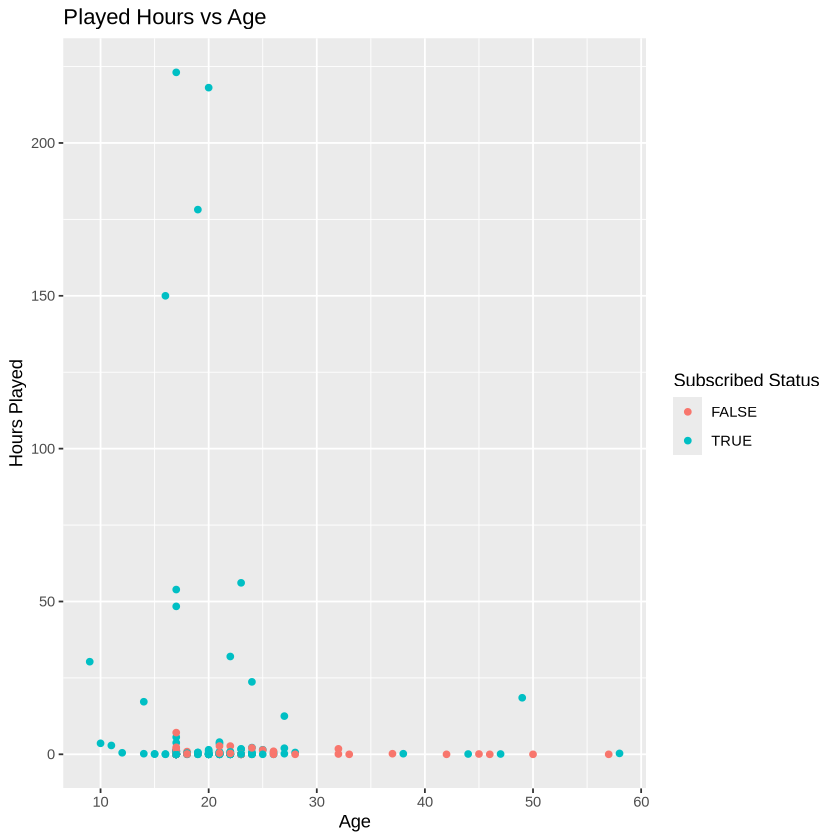

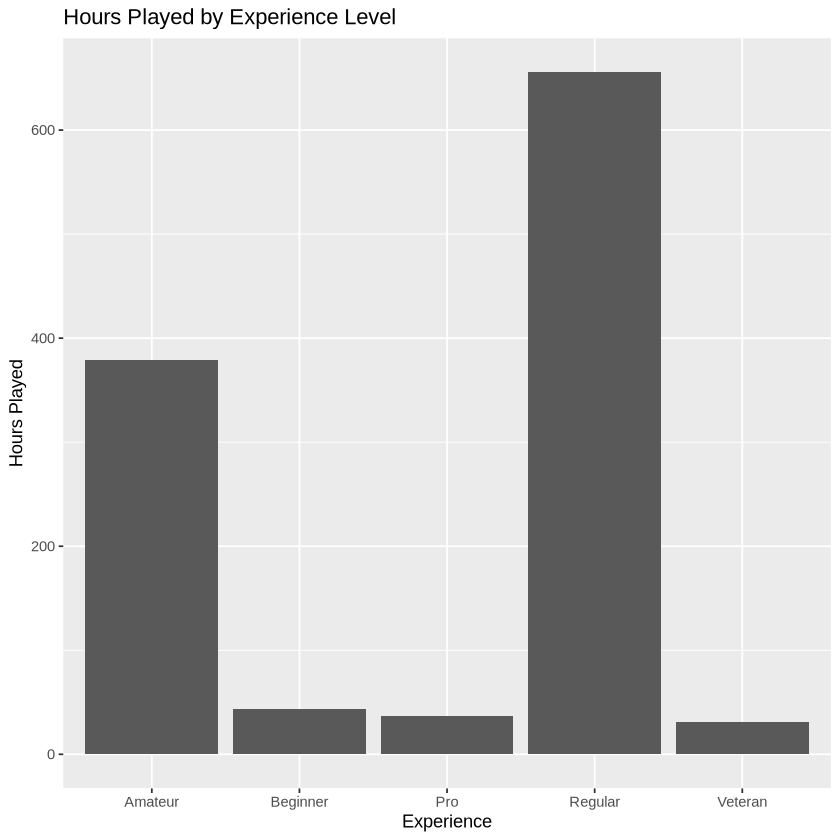

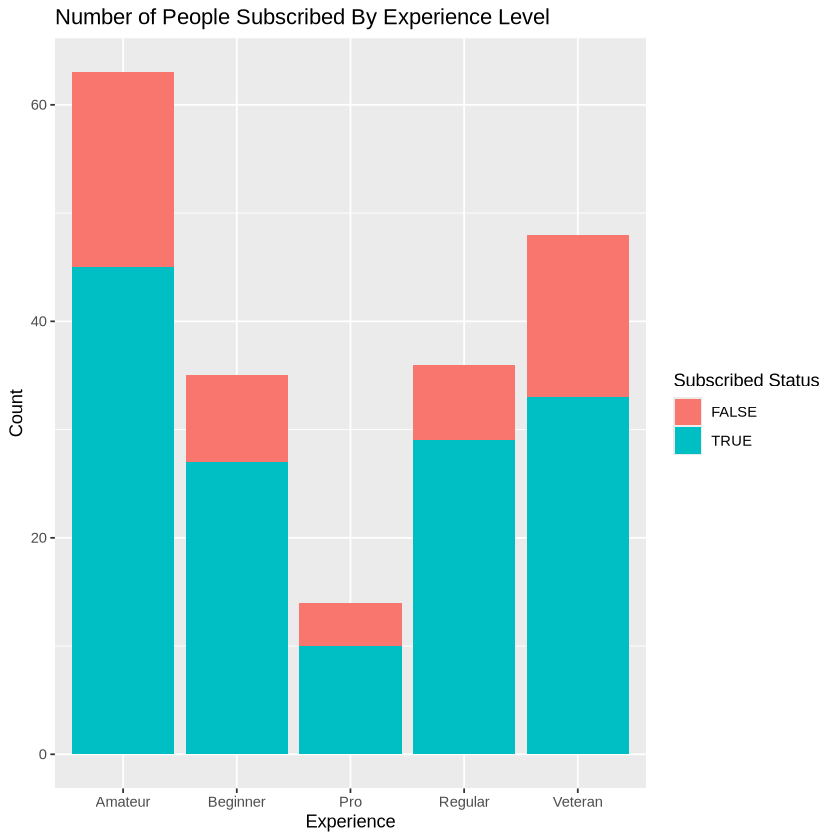

In [5]:
hours_age_plot <- ggplot(players_data, aes(x = age, y = played_hours)) +
  geom_point(aes(color = subscribe)) +
  labs(
    x = "Age",
    y = "Hours Played",
    title = "Played Hours vs Age",
    color = "Subscribed Status"
  )
hours_age_plot

hours_experience_plot <- ggplot(players_data, aes(x = experience, y = played_hours)) +
  geom_bar(stat = "identity") +
  labs(
    x = "Experience",
    y = "Hours Played",
    title = "Hours Played by Experience Level"
  )
hours_experience_plot

subscribe_experience_plot <- ggplot(players_data, aes(x = experience)) +
  geom_bar(aes(fill = subscribe)) +
  labs(
    x = "Experience",
    y = "Count",
    title = "Number of People Subscribed By Experience Level",
    fill = "Subscribed Status"
  )
subscribe_experience_plot

4) # **Methods and Plan**
Based on my data and question, I believe the best method to pursue my data is k-NN classification. This method will allow me to capture grouping patterns, and since the variable we are interested in is a non-quantitative variable, it makes more sense to use classification over regression. The assumption that must be made is that there is a relationship between the predictor and response variables. A limitation of classification is that my data can be heavily skewed by outliers, and since the data seems to be self-reported, this may be a problem in the future. To process my data, I will make sure the start and end dates are in a proper date-time format so that calculations, such as session duration, can be done accurately. The data will be split into 75% for training and 25% for testing after my start and end dates are properly formatted. To increase accuracy, I will use cross-validation and tune my model.